## <center><font color=navy>Python ile Algoritmik Ticaret</font></center>
### <center>Veri İşleme ve Grafikleme</center>
#### <center>Serkan Polat</center>

Bir algoritmik ticaret sistemi tasarlamak, bir dizi birbiriyle bağlantılı adımı içerir. İşte bu süreçteki ana aşamalar:

1. **Piyasa ve Ticaret Temelleri:** Bu, piyasa ve ticaret temellerini anlamayı içerir. Finansal enstrümanları (hisse senetleri, tahviller, kripto paralar, opsiyonlar, vadeli işlemler vb.), farklı piyasa türlerini ve ticaret kavramlarını tanıyın. Piyasaları etkileyen temel ve makroekonomik faktörleri anlamak da önemlidir.

2. **Ticaret Stratejisi Seçimi:** Otomatize etmek istediğiniz ticaret stratejisini seçin. Yaygın stratejiler arasında ortalama reversion, momentum, istatistiksel arbitraj, çiftler ticareti, yüksek frekanslı ticaret (HFT) vb. bulunur. Seçilen strateji, ticaret hedefleriniz, risk toleransınız ve mevcut sermayenizle uyumlu olmalıdır.

3. **Veri Toplama:** Geri test ve canlı ticaret için tarih öncesinde ve gerçek zamanlı veri edinin. Veri, fiyat, hacim, temel veriler veya hatta sosyal medya duygusu ve sınırlı emir defteri verileri gibi alternatif verileri içerebilir.

4. **Ticaret Algoritması Formüle Etme:** Seçilen stratejiyi kullanarak bir ticaret algoritması formüle edin. Bu, işlemlerin hangi koşullar altında yapılacağını ayrıntılı olarak belirtmelidir. Yani giriş ve çıkış noktalarını, pozisyon boyutlandırmayı ve risk yönetimi önlemlerini belirtmelidir.

5. **Geri Test:** Algoritmanızı test etmek için tarih öncesinde veri kullanın. Geri test, canlı dağıtımdan önce stratejinizin performansını değerlendirmenize yardımcı olur. Bu sırasında, modelin tarih öncesinde iyi performans gösterip gerçek piyasa senaryosunda başarısız olabileceği aşırı uyum sorunlarına dikkat edilmelidir. Daha sağlam stratejiler bulmak için bazı gelişmiş geri test yöntemleri bulunmaktadır.

6. **Değerlendirme:** Algoritmanın performansını Sharpe oranı, geri çekilme, yatırım getirisi vb. gibi çeşitli ölçümler kullanarak değerlendirin. Bu, stratejinin risk ve ödül dengesini anlamanıza yardımcı olur.

7. **Kağıt Üzerinde Ticaret (Paper Trading):** Bu, algoritmanın gerçek zamanlı piyasa verileri üzerinde çalıştığı, varsayımsal işlemler gerçekleştirdiği bir tür canlı test şeklidir (gerçek para işlemleri değil) ve mevcut piyasa koşullarında performansı doğrulamak için kullanılır.

8. **Canlı Ticaret:** Stratejiniz geri test ve kağıt üzerinde ticaret sırasında iyi performans gösterirse, canlı ticarete geçebilirsiniz. Bu, gerçek para ve gerçek işlemlerin gerçekleştirildiği bir aşamadır.

9. **Performans İzleme ve Ayarlama:** Canlı ticaret sırasında algoritmanın performansını sürekli izleyin. Piyasa koşulları değişebilir ve bir algoritma ayarlamalar veya hatta tamamen yeniden çalıştırmalar gerektirebilir.

10. **Risk Yönetimi:** Tüm bu adımlar boyunca, risk yönetimini akılda tutmak önemlidir. Stop-loss noktaları belirleyin, kaldıraçı iyi yönetin ve olumsuz piyasa koşullarına karşı portföyünüzü çeşitlendirin.

Unutmayın, bir algoritmik ticaret sisteminin en önemli kısmı yalnızca ticaret stratejisi değil, aynı zamanda sistemin dayanıklılığı, risk yönetimi ve değişen piyasa koşullarına uyum yeteneğidir.

> Bu defterde, hem tarihsel hem de gerçek zamanlı ticaret verilerini elde etmek için kullanılan kaynaklara odaklanıyoruz.

#### 1. Açık Veri Kaynakları ve Broker API'sinden Finansal Veri Okuma
#### 2. Web Kazıma (Web Scraping)
#### 3. CSV Dosyalarından Veri Okuma, İnceleme ve Temizleme"

In [43]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import quandl
import bs4 as bs
import os
import requests

# Matplotlib ayarları
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import style
plt.rcParams["figure.figsize"] = (20, 10)

%matplotlib inline

In [4]:
start=dt.datetime(2018,1,1)
end=dt.datetime.now()

df=yf.download("THYAO.IS",start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,15.690000,15.690000,15.69,15.690000,15.690000,0
2018-01-02,15.790000,16.180000,15.67,16.080000,16.080000,44253261
2018-01-03,16.049999,16.230000,15.92,16.200001,16.200001,40100544
2018-01-04,16.200001,16.510000,16.18,16.290001,16.290001,54106099
2018-01-05,16.440001,16.549999,16.18,16.330000,16.330000,55516943


In [6]:
df.to_csv("THYAO.csv")

In [7]:
dff=pd.read_csv("THYAO.csv",parse_dates=True,index_col=0)
dff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,15.690000,15.690000,15.69,15.690000,15.690000,0
2018-01-02,15.790000,16.180000,15.67,16.080000,16.080000,44253261
2018-01-03,16.049999,16.230000,15.92,16.200001,16.200001,40100544
2018-01-04,16.200001,16.510000,16.18,16.290001,16.290001,54106099
2018-01-05,16.440001,16.549999,16.18,16.330000,16.330000,55516943


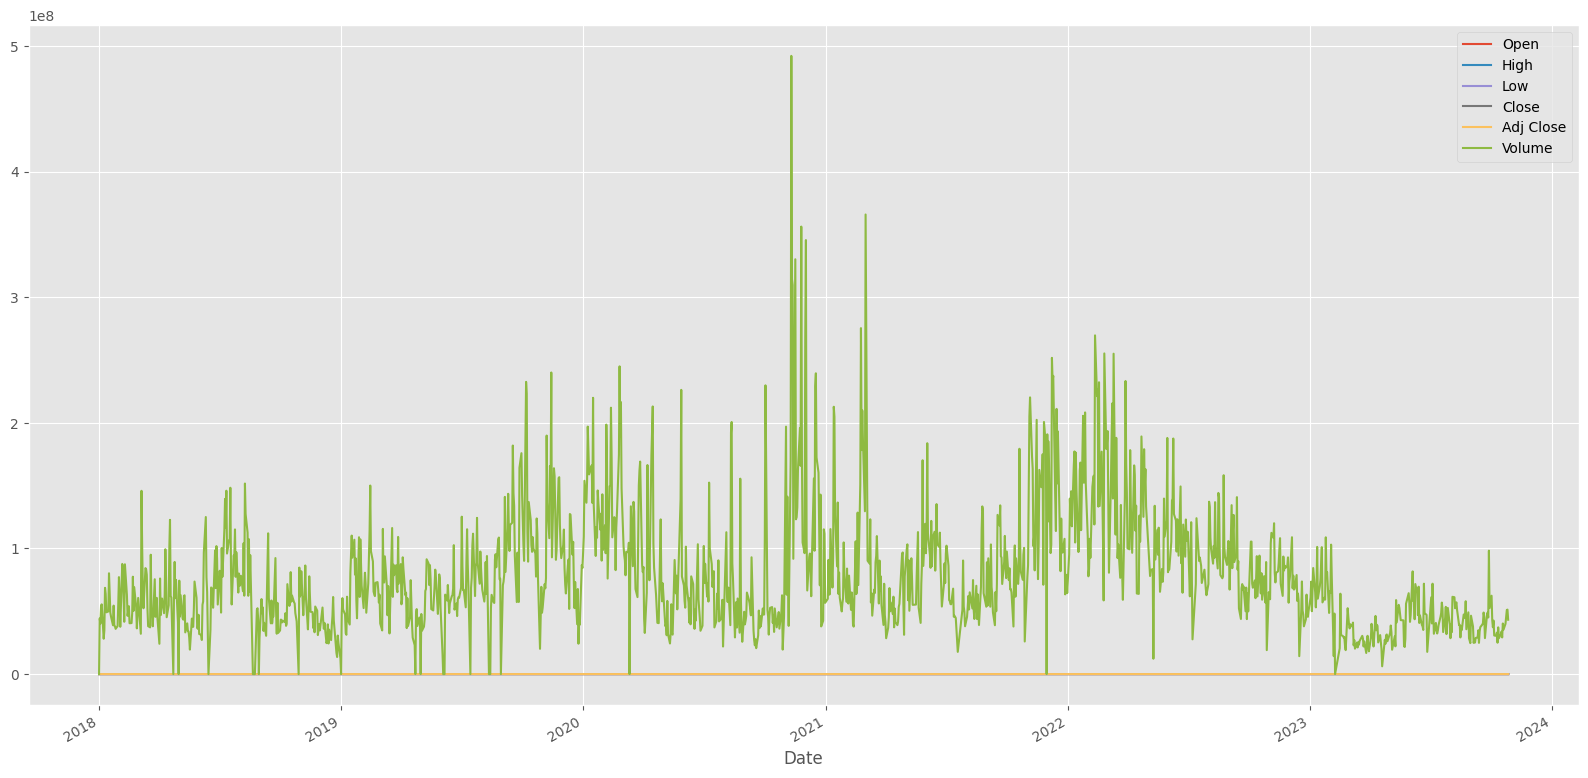

In [8]:
style.use("ggplot")
df.plot()
plt.show()

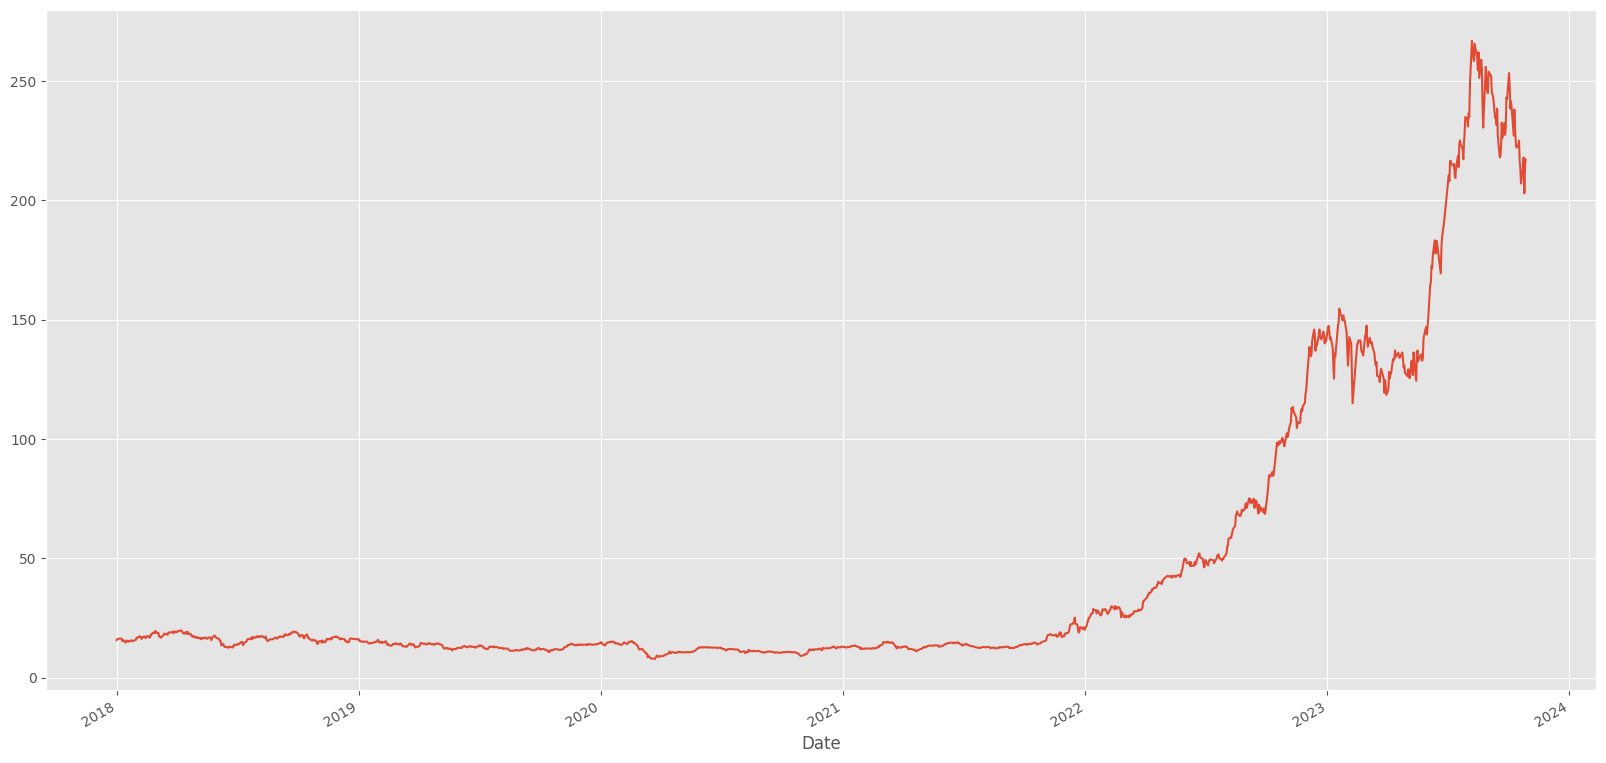

In [9]:
df["Adj Close"].plot()
plt.show()

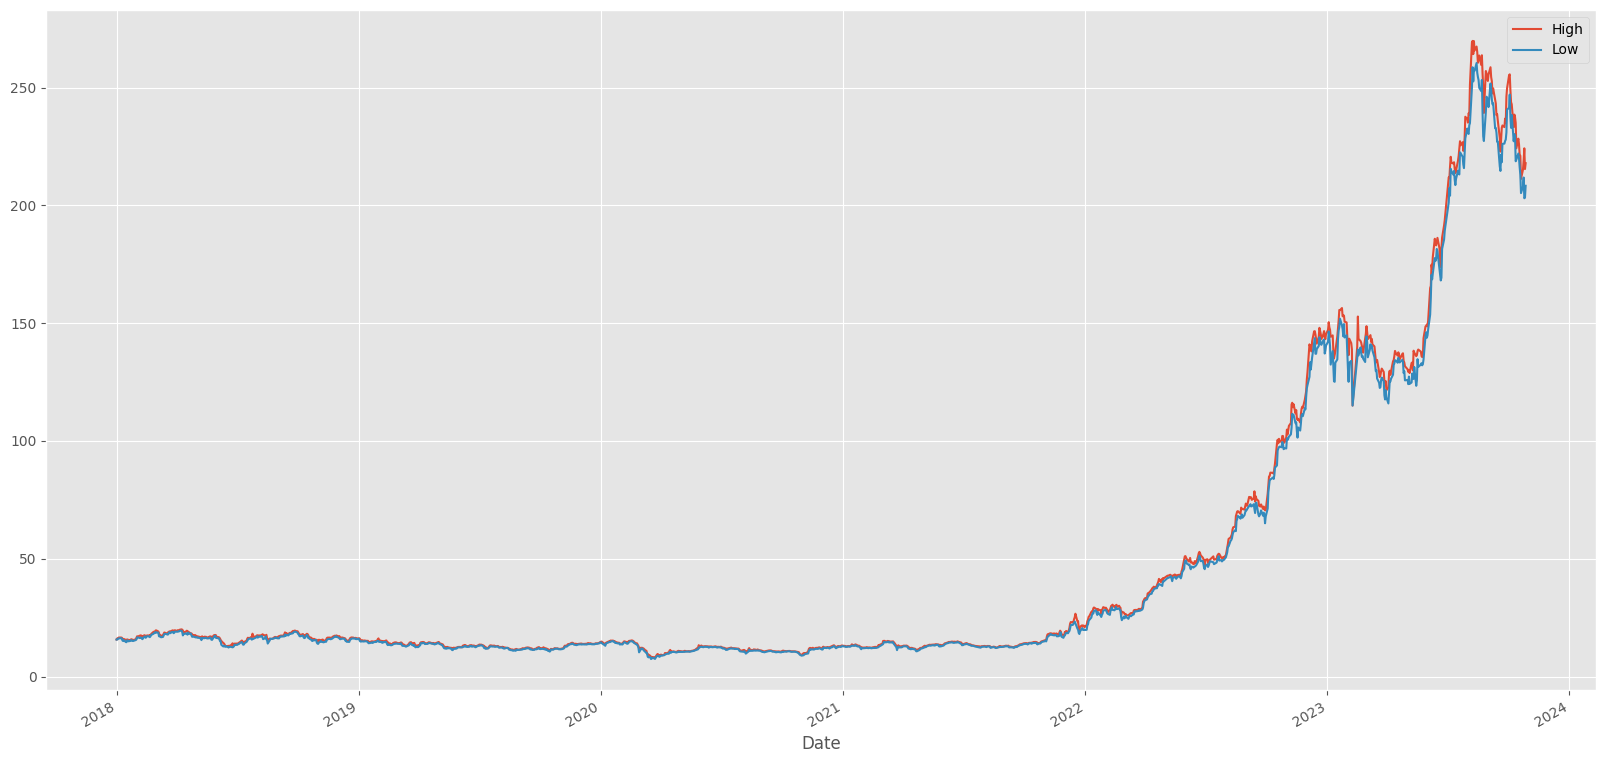

In [10]:
df[["High","Low"]].plot()
plt.show()

In [11]:
df["100ma"]=df["Adj Close"].rolling(window=100).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2023-10-23,211.899994,215.199997,208.000000,213.699997,213.699997,40027784,222.006001
2023-10-24,213.699997,219.000000,211.800003,218.000000,218.000000,45914271,222.748000
2023-10-25,219.699997,224.199997,203.000000,203.000000,203.000000,50988232,223.308000
2023-10-26,205.000000,215.399994,203.300003,214.199997,214.199997,51300520,223.949000
2023-10-27,214.199997,217.899994,208.300003,217.199997,217.199997,43258407,224.476000


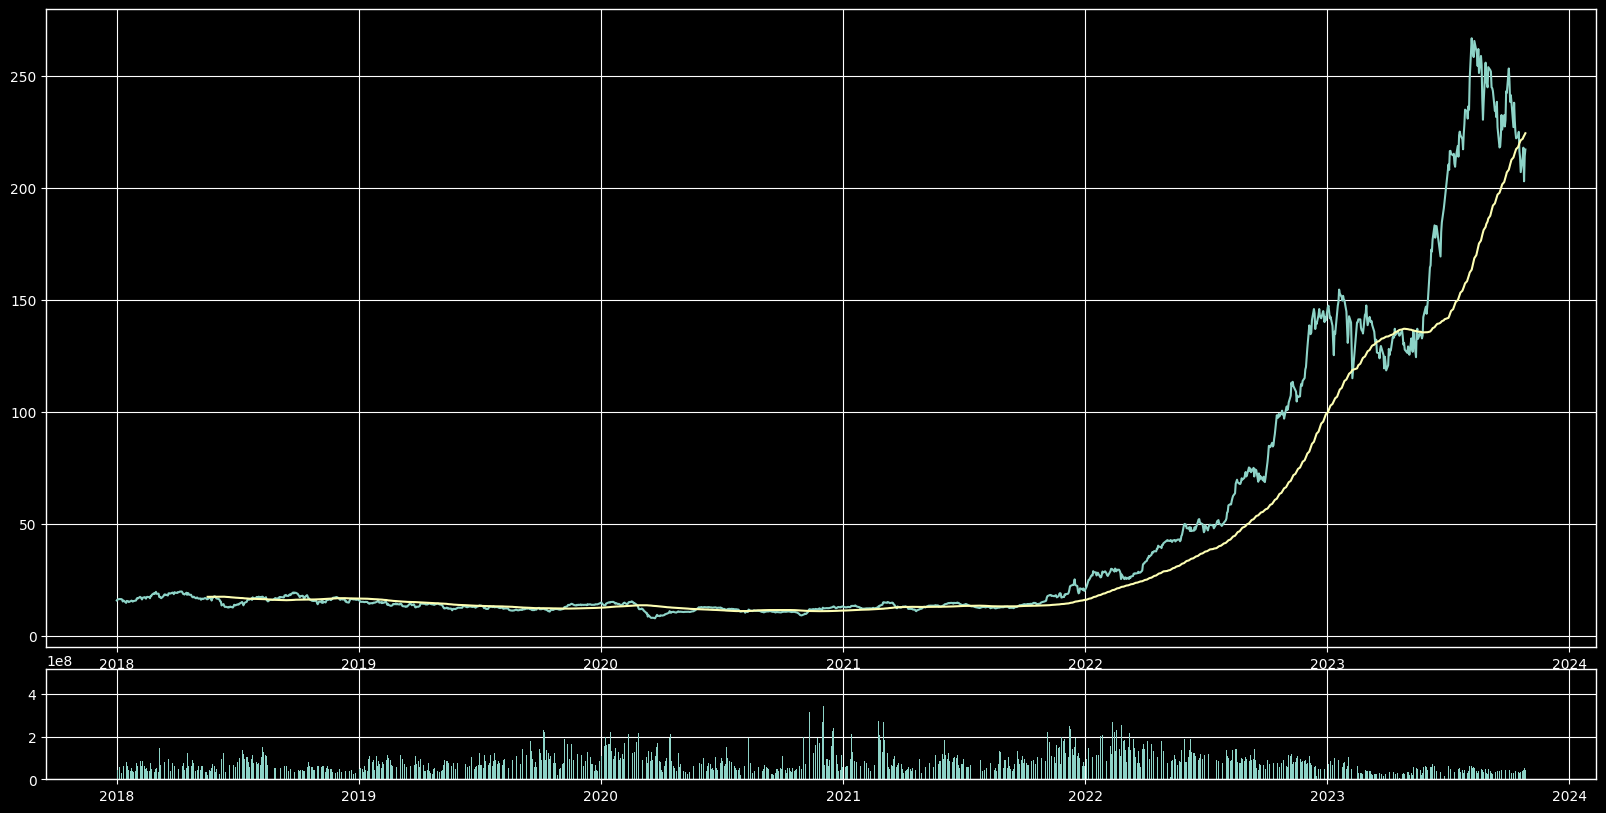

In [12]:
plt.style.use("dark_background")

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(df["Adj Close"])
ax1.plot(df["100ma"])
ax2.bar(df.index,df["Volume"])

plt.show()

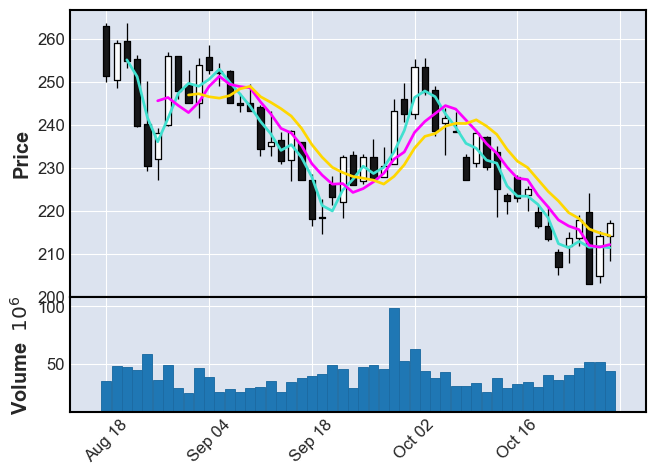

In [15]:
mpf.plot(df[-50:],type="candle",mav=(3,6,9),volume=True)

In [16]:
THYAO=yf.download("THYAO.IS",start=dt.datetime(2020,1,1),end=dt.datetime.now())
THYAO.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,957.000000,957.000000,957.000000,957.000000,957.000000,9.570000e+02
mean,61.411735,62.614650,60.262372,61.415810,61.415810,8.669895e+07
std,70.948776,72.312454,69.555418,70.879859,70.879859,5.499598e+07
min,7.600000,7.950000,7.410000,7.740000,7.740000,0.000000e+00
25%,12.560000,12.710000,12.400000,12.540000,12.540000,4.818152e+07
50%,18.700001,18.809999,18.049999,18.690001,18.690001,7.254129e+07
75%,107.500000,109.599998,105.599998,107.199997,107.199997,1.086468e+08
max,267.700012,269.799988,260.399994,266.899994,266.899994,4.921997e+08


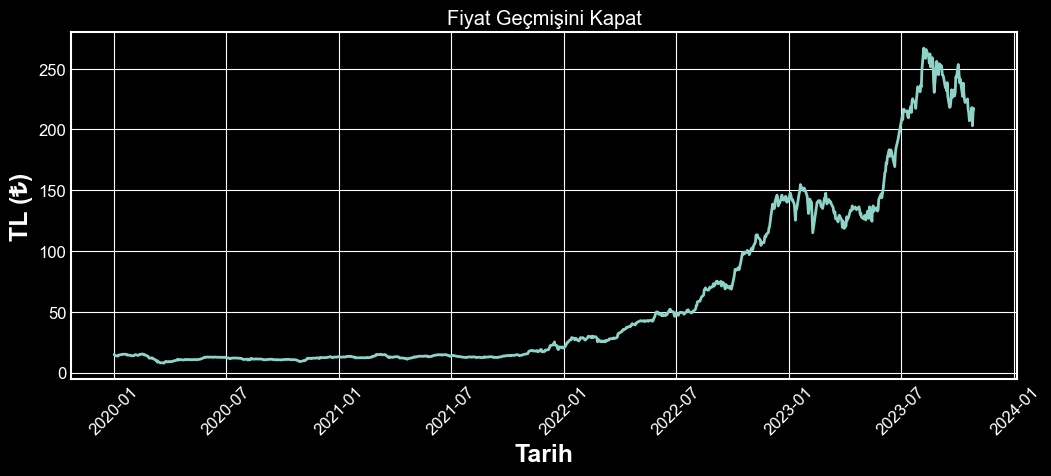

In [17]:
# Hisse Senedi Fiyatını Görsel Olarak Göster
# Başlığı oluştur

title="Fiyat Geçmişini Kapat"

plt.style.use("dark_background")
plt.figure(figsize=(12.2,4.5))
plt.plot(THYAO["Close"],label="Close")
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel("Tarih",fontsize=18)
plt.ylabel('TL (₺)',fontsize=18)
plt.show()

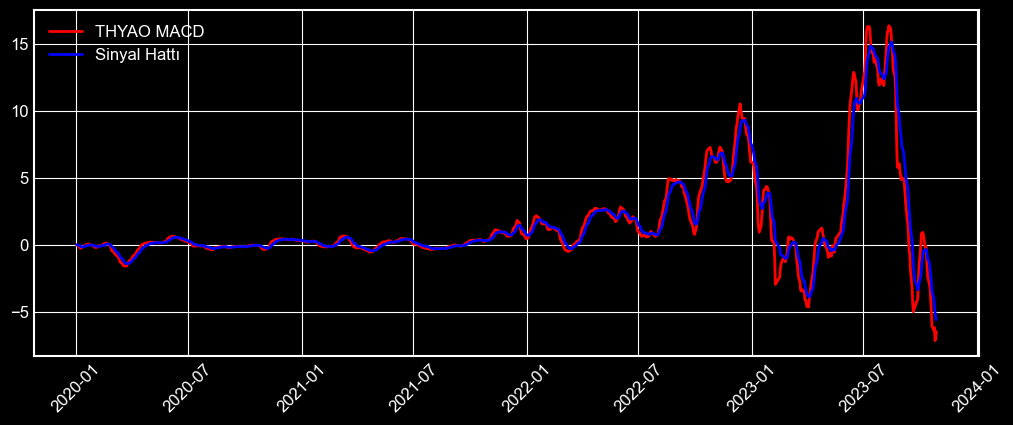

In [21]:
# MAD ve Sinyal Hattı göstergelerini hesaplayın

# Kısa Vadeli Üstel Hareketli Ortalamayı Hesapla

ShortEMA=THYAO.Close.ewm(span=12,adjust=False).mean() # AKA Hızlı hareket eden ortalama
LongEMA=THYAO.Close.ewm(span=26,adjust=False).mean() # AKA Yavaş hareket eden ortalama

MACD=ShortEMA - LongEMA

# Sinyal hattını hesapla
signal=MACD.ewm(span=9,adjust=False).mean()

plt.figure(figsize=(12.2,4.5))
plt.plot(MACD,label="THYAO MACD",color="red")
plt.plot(signal,label="Sinyal Hattı",color="blue")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

In [23]:
# Veri çerçevesi için yeni sütunlar oluştur

THYAO["MACD"]=MACD
THYAO["Signal Line"]=signal

THYAO

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2020-01-02,14.500000,14.840000,14.480000,14.830000,14.830000,109370878,0.000000,0.000000
2020-01-03,14.670000,14.730000,14.090000,14.270000,14.270000,153873531,-0.044672,-0.008934
2020-01-06,14.030000,14.080000,13.500000,13.570000,13.570000,136423179,-0.135003,-0.034148
2020-01-07,13.790000,13.860000,13.520000,13.540000,13.540000,154729229,-0.206630,-0.068645
2020-01-08,13.050000,13.620000,13.030000,13.500000,13.500000,197012716,-0.263584,-0.107633
...,...,...,...,...,...,...,...,...
2023-10-23,211.899994,215.199997,208.000000,213.699997,213.699997,40027784,-6.363839,-4.013413
2023-10-24,213.699997,219.000000,211.800003,218.000000,218.000000,45914271,-6.175825,-4.445895
2023-10-25,219.699997,224.199997,203.000000,203.000000,203.000000,50988232,-7.154721,-4.987660


In [26]:
# Bir varlık ne zaman satın alacağınızı ve satacağınızı işaret etmek için bir işlev oluşturun

def buy_sell(signal):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag=-1
    for i in range(0,len(signal)):
        # eğer MACD > sinyal çizgisi o zaman al, yada sat
        if signal["MACD"][i]>signal["Signal Line"][i]:
            if flag !=1:
                sigPriceBuy.append(signal["Close"][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif signal["MACD"][i]< signal["Signal Line"][i]:
            if flag!=0:
                sigPriceSell.append(signal["Close"][i])
                sigPriceBuy.append(np.nan)
                flag=0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy,sigPriceSell)            
    

In [27]:
x=buy_sell(THYAO)
THYAO["Buy_Signal_Price"] = x[0]
THYAO["Sell_Signal_Price"] = x[1]

THYAO

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,14.500000,14.840000,14.480000,14.830000,14.830000,109370878,0.000000,0.000000,NaN,NaN
2020-01-03,14.670000,14.730000,14.090000,14.270000,14.270000,153873531,-0.044672,-0.008934,NaN,14.27
2020-01-06,14.030000,14.080000,13.500000,13.570000,13.570000,136423179,-0.135003,-0.034148,NaN,NaN
2020-01-07,13.790000,13.860000,13.520000,13.540000,13.540000,154729229,-0.206630,-0.068645,NaN,NaN
2020-01-08,13.050000,13.620000,13.030000,13.500000,13.500000,197012716,-0.263584,-0.107633,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-23,211.899994,215.199997,208.000000,213.699997,213.699997,40027784,-6.363839,-4.013413,NaN,NaN
2023-10-24,213.699997,219.000000,211.800003,218.000000,218.000000,45914271,-6.175825,-4.445895,NaN,NaN
2023-10-25,219.699997,224.199997,203.000000,203.000000,203.000000,50988232,-7.154721,-4.987660,NaN,NaN


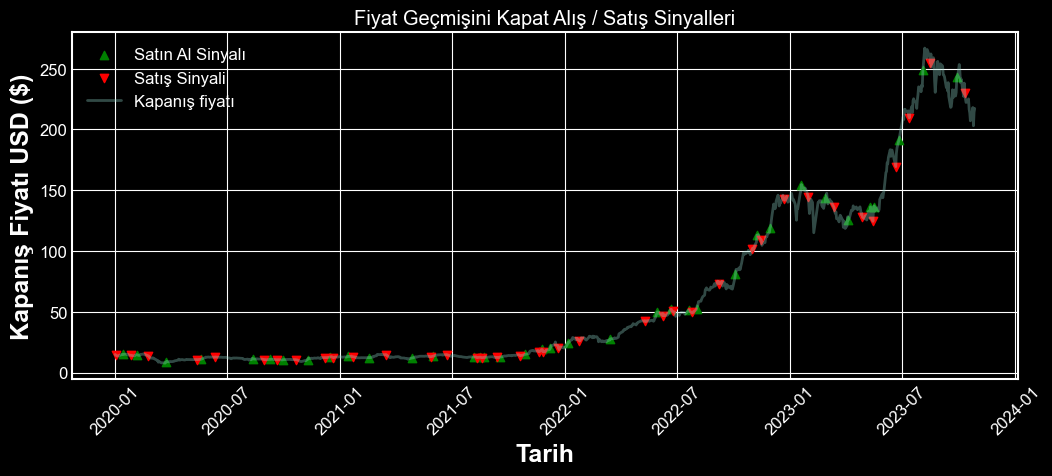

In [28]:
# Hisse Senedi alım ve satım sinyallerini görsel olarak gösterin

title = 'Fiyat Geçmişini Kapat Alış / Satış Sinyalleri'

my_stocks=THYAO

plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Satın Al Sinyalı ', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Satış Sinyali', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Kapanış fiyatı', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatı USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

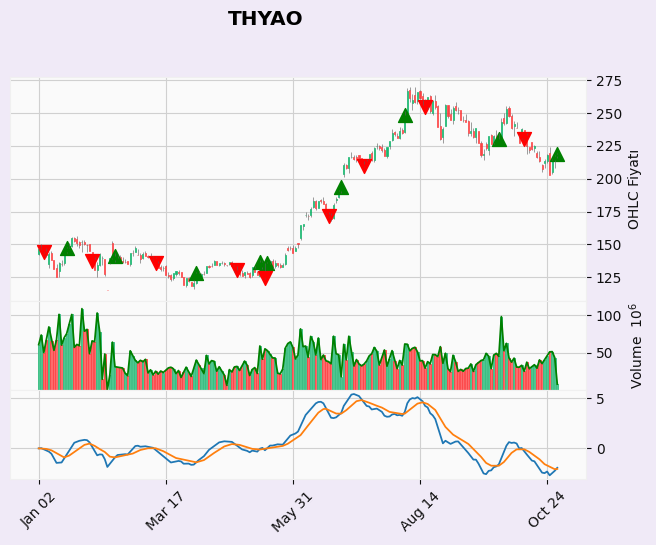

In [33]:
# THYAO için hisse sembolünü ayarlaylım
ticker_symbol="THYAO.IS"

# Bir hisse senedi nesnesi oluşturdum
ticker_data=yf.Ticker(ticker_symbol)

# 2023 yılının başından bugüne kadar olan tarihsel verileri al
historical_data=ticker_data.history(period="1d",start="2023-01-01",end=datetime.datetime.today())

# Belirtilen kısa ve uzun EMA'ları kullanarak MACD'yi hesapla.
short_ema=historical_data["Close"].ewm(span=12,adjust=False).mean()
long_ema=historical_data["Close"].ewm(span=16,adjust=False).mean()
historical_data["MACD"]=short_ema-long_ema
historical_data["Signal Line"]=historical_data["MACD"].ewm(span=9,adjust=False).mean()


# Alım ve Satım Sinyallerini Hesapla
historical_data['Buy Signal'] = (historical_data['MACD'] > historical_data['Signal Line']) & (historical_data['MACD'].shift(1) < historical_data['Signal Line'].shift(1))
historical_data['Sell Signal'] = (historical_data['MACD'] < historical_data['Signal Line']) & (historical_data['MACD'].shift(1) > historical_data['Signal Line'].shift(1))

# Aynı dizine sahip, 'float64' türünde NaN değerlerle Seri Oluştur
buy_signals=pd.Series(index=historical_data.index,dtype="float64")
sell_signals=pd.Series(index=historical_data.index,dtype="float64")

# İlgili endeks konumlarındaki alım ve satış sinyallerini doldurun.
buy_signals.loc[historical_data["Buy Signal"]]=historical_data.loc[historical_data["Buy Signal"],"Close"]
sell_signals.loc[historical_data["Sell Signal"]]=historical_data.loc[historical_data["Sell Signal"],"Close"]


# OHLC çubuk grafik, işlem hacmi, MACD ve alım/satım sinyalleri içeren özel bir grafik oluşturun.
apds = [mpf.make_addplot(historical_data['Volume'], panel=1, color='g'),
        mpf.make_addplot(historical_data[['MACD', 'Signal Line']], panel=2, secondary_y=False),
        mpf.make_addplot(buy_signals, scatter=True, markersize=100, marker='^', panel=0, color='g'),
        mpf.make_addplot(sell_signals, scatter=True, markersize=100, marker='v', panel=0, color='r')]


# Stil ve Şekil Boyutunu Ayarla
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'figure.facecolor': '#f0eaf7'})

# Özelleştirilmiş grafiği çiz
mpf.plot(historical_data, type='candle', addplot=apds, volume=True, style=mpf_style, title='THYAO', ylabel='OHLC Fiyatı')


### Veri Sağlayıcıları

Python hakkında harika özelliklerden biri, açık kaynak olduğu için hayatınızı kolaylaştıran ve Python ile daha fazla şey yapmanıza olanak tanıyan farklı üçüncü taraf platformlarının oluşturulmuş olmasıdır.

#### Intrinio https://intrinio.com
misyonu finansal verileri uygun fiyatlı ve erişilebilir hale getirmektir. Intrinio API, yatırım spektrumunda bulunan 200'den fazla finansal veri kaynağıyla gerçek zamanlı ve geçmiş hisse senedi fiyat teklifleri, şirket finansalları ve daha fazlasını sunmaktadır. Intrinio, verilerine hem CSV toplu indirmeler hem de API'ler aracılığıyla erişim sağlar.

 - API, uygulama programlama arayüzünün kısaltmasıdır.
 - pip install intrinio-sdk

#### Quandl https://www.quandl.com/tools/python
finansal, ekonomik ve alternatif veriler için birinci sınıf bir kaynaktır ve yatırım profesyonellerine hizmet verir. Quandl platformu, dünyanın önde gelen hedge fonları, varlık yöneticileri ve yatırım bankalarından gelen analistler de dahil olmak üzere 400.000'den fazla kişi tarafından kullanılmaktadır.

In [35]:
print(dir(quandl))

['ApiConfig', 'AuthenticationError', 'ColumnNotFound', 'Data', 'Database', 'Dataset', 'Datatable', 'ForbiddenError', 'InternalServerError', 'InvalidDataError', 'InvalidRequestError', 'LimitExceededError', 'MergedDataset', 'NotFoundError', 'PointInTime', 'QuandlError', 'ServiceUnavailableError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'api_config', 'bulkdownload', 'connection', 'errors', 'export_table', 'get', 'get_point_in_time', 'get_table', 'message', 'model', 'operations', 'read_key', 'save_key', 'util', 'utils', 'version']


In [41]:
MSFT = quandl.get("WIKI/MSFT", start_date ="2014-01-01", end_date = "2016-01-01")
MSFT.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.0,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,44.548189,44.955572,44.166873,44.583457,3.463500e+07,0.004841,1.0,41.364994,41.743991,41.010925,41.398028,3.463500e+07
std,4.615337,4.671582,4.588539,4.631879,1.690314e+07,0.038288,0.0,4.791559,4.852924,4.760505,4.808005,1.690314e+07
min,34.730000,35.880000,34.630000,34.980000,9.009132e+06,0.000000,1.0,31.339993,32.377741,31.249754,31.565590,9.009132e+06
25%,41.370000,41.682500,41.040000,41.475000,2.620219e+07,0.000000,1.0,38.090304,38.439316,37.872167,38.189407,2.620219e+07
50%,44.545000,44.977500,44.090000,44.400000,3.115255e+07,0.000000,1.0,41.435430,41.785142,41.027103,41.501312,3.115255e+07
75%,46.942500,47.452500,46.542500,47.002500,3.763190e+07,0.000000,1.0,43.976987,44.363684,43.524012,44.023963,3.763190e+07
max,56.470000,56.850000,56.287500,56.550000,2.025224e+08,0.360000,1.0,53.771803,54.133647,53.598023,53.847981,2.025224e+08


In [42]:
# BTC/USD Exchange Rate" ifadesi, "BTC/USD Döviz Kuru" olarak çevrilebilir. İlgili veri kaynağına erişmek için verilen URL adresi kullanılıyor: https://www.quandl.com/data/BITFINEX/BTCUSD-BTC-USD-Exchange-Rate.
BTC = quandl.get("BITFINEX/BTCUSD")
BTC.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


## Tüm S&P 500 şirketlerinin fiyatlarını tek bir Veri Çerçevesi'nde birleştirme

In [44]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

#pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,11,1)
end = datetime.datetime(2020,1,31)
tickers=tickers+["SPY"];

data = yf.download(tickers, start=start, end=end)['Adj Close']

# data = yf.download(tickers, period="5d", interval="1m")
print(data)

[*********************100%***********************]  504 of 504 completed

9 Failed downloads:
- VLTO: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- OTIS: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- ABNB: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- BRK.B: No timezone found, symbol may be delisted
- GEHC: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- CEG: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- BF.B: No data found for this date range, symbol may be delisted
- CARR: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- KVUE: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
                    A        AAL       AAPL       ABBV  ABNB        ABT  \
Date                                                                      
2018-11-01  62.879158  35.692745  53.206890  63.505085   NaN  64.505867   
2018-11-02  63.563660  35.653484 

In [45]:
if not os.path.exists('Data'):
    os.makedirs('Data')
data.to_csv('Data/SP500Prices.csv')

In [46]:
# Getirileri hesaplamadan önce temizleyin
cleaned_data = data.copy()

# Belirli bir zaman aralığı boyunca tüm eksik değerlere sahip şirketleri (sütunları) kaldırın.
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Eksik değerlerin tüm şirketler için bulunduğu günleri (satırları) kaldır" şeklinde çevrilebilir.
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Son olarak, en az bir NaN (eksik değer) içeren sütunları kaldırın.
cleaned_data.dropna(axis='columns', how='any', inplace=True)

cleaned_data

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-01,62.879158,35.692745,53.206890,63.505085,64.505867,28.690001,147.850220,245.279999,79.976105,42.585621,...,106.849152,42.096115,62.403160,33.466713,64.887344,80.469017,109.079613,169.000000,40.552322,91.197273
2018-11-02,63.563660,35.653484,49.677635,62.990448,64.542656,28.030001,146.740753,239.639999,79.230865,41.956280,...,105.957397,41.444752,63.393326,33.267269,64.198364,79.472176,107.603035,168.059998,41.055180,89.765213
2018-11-05,63.544407,35.151600,48.267384,65.381493,64.726555,27.830000,147.868866,239.889999,78.503799,42.043686,...,103.690063,42.035324,63.153511,33.172314,64.660835,79.993462,107.500221,168.000000,41.472809,89.716835
2018-11-06,63.611893,34.610352,48.789337,66.236565,65.250694,27.879999,148.633392,240.559998,79.939766,41.370628,...,104.060051,42.678009,63.424255,33.723122,65.925545,80.386696,107.509583,178.740005,41.924511,89.755539
2018-11-07,65.810066,36.381710,50.269054,68.849297,66.666809,28.160000,152.782288,253.429993,80.257820,42.218502,...,108.139343,42.990665,64.228752,34.672806,67.482841,81.740219,110.425362,180.240005,42.367718,92.106827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,86.030807,27.538231,77.629082,70.823418,84.864204,44.990002,197.672134,351.369995,109.636536,40.377575,...,132.974106,60.389038,54.304657,57.188286,77.877792,98.015556,139.470505,252.699997,41.100826,133.109146
2020-01-27,84.373741,26.013866,75.346382,71.230339,84.103813,44.549999,195.757660,346.899994,104.638222,39.675747,...,122.257240,60.164284,53.010914,57.255390,76.673492,97.464691,139.696976,243.229996,40.950977,132.767380
2020-01-28,84.978073,26.800957,77.477882,71.018394,84.056870,44.660000,199.254898,354.630005,106.596504,40.031227,...,123.323006,60.434002,52.937222,56.632313,77.677055,97.866173,140.791611,247.979996,41.506271,135.013367


In [47]:
prices = cleaned_data
R = np.log(prices).diff().dropna()
print(R.shape)
R.head()

(311, 490)


,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-02 00:00:00,0.010827,-0.001101,-0.068633,-0.008137,0.000570,-0.023273,-0.007532,-0.023263,-0.009362,-0.014889,...,-0.008381,-0.015594,0.015743,-0.005977,-0.010675,-0.012465,-0.013629,-0.005578,0.012324,-0.015827
2018-11-05 00:00:00,-0.000303,-0.014177,-0.028799,0.037256,0.002845,-0.007161,0.007658,0.001043,-0.009219,0.002081,...,-0.021631,0.014149,-0.003790,-0.002858,0.007178,0.006538,-0.000956,-0.000357,0.010121,-0.000539
2018-11-06 00:00:00,0.001061,-0.015517,0.010756,0.012993,0.008065,0.001795,0.005157,0.002789,0.018126,-0.016138,...,0.003562,0.015173,0.004278,0.016468,0.019370,0.004904,0.000087,0.061968,0.010833,0.000431
2018-11-07 00:00:00,0.033972,0.049913,0.029878,0.038687,0.021471,0.009993,0.027531,0.052118,0.003971,0.020287,...,0.038452,0.007299,0.012605,0.027772,0.023347,0.016697,0.026760,0.008357,0.010516,0.025859
2018-11-08 00:00:00,-0.006910,-0.002980,-0.003495,0.008816,0.006324,0.006725,0.003837,-0.013787,0.018178,0.005574,...,-0.140789,-0.003440,-0.016025,0.007912,0.000839,0.012011,0.008931,0.012351,0.014182,-0.003051


In [48]:
# iloc ve DataFrame Kullanarak Tekli Seçimler

### Satırlar:

data.iloc[0] # Veri çerçevesinin ilk satırı - Bir Seri veri türü çıktısı olarak dikkate alınır.
data.iloc[1] # Data frame'in ikinci satırı
data.iloc[-1] # Data frame'in son satırı

### Sütunlar

data.iloc[:,0] # DataFrame'in ilk sütunu
data.iloc[:,1] # DataFrame'in ikinci sütunu
data.iloc[:,-1] # DataFrame'in son sütunu

# iloc ve DataFrame Kullanarak Çoklu Satır ve Sütun Seçimleri

data.iloc[0:5] # DataFrame'in ilk beş satırı
data.iloc[:, 0:2] # Veri çerçevesinin tüm satırlarındaki ilk iki sütun
data.iloc[[0,3,6,24], [0,5,6]] # 1. satır, 4. satır, 7. satır ve 25. satır ile 1. 6. ve 7. sütunların toplamı.
data.iloc[0:5, 5:8] # Veri çerçevesinin ilk 5 satırı ve 5. (beşinci), 6. (altıncı) ve 7. (yedinci) sütunları.

,ABT,ACGL,ACN
Date,,,
2018-11-01 00:00:00,64.505867,28.690001,147.850220
2018-11-02 00:00:00,64.542656,28.030001,146.740753
2018-11-05 00:00:00,64.726555,27.830000,147.868866
2018-11-06 00:00:00,65.250694,27.879999,148.633392
2018-11-07 00:00:00,66.666809,28.160000,152.782288


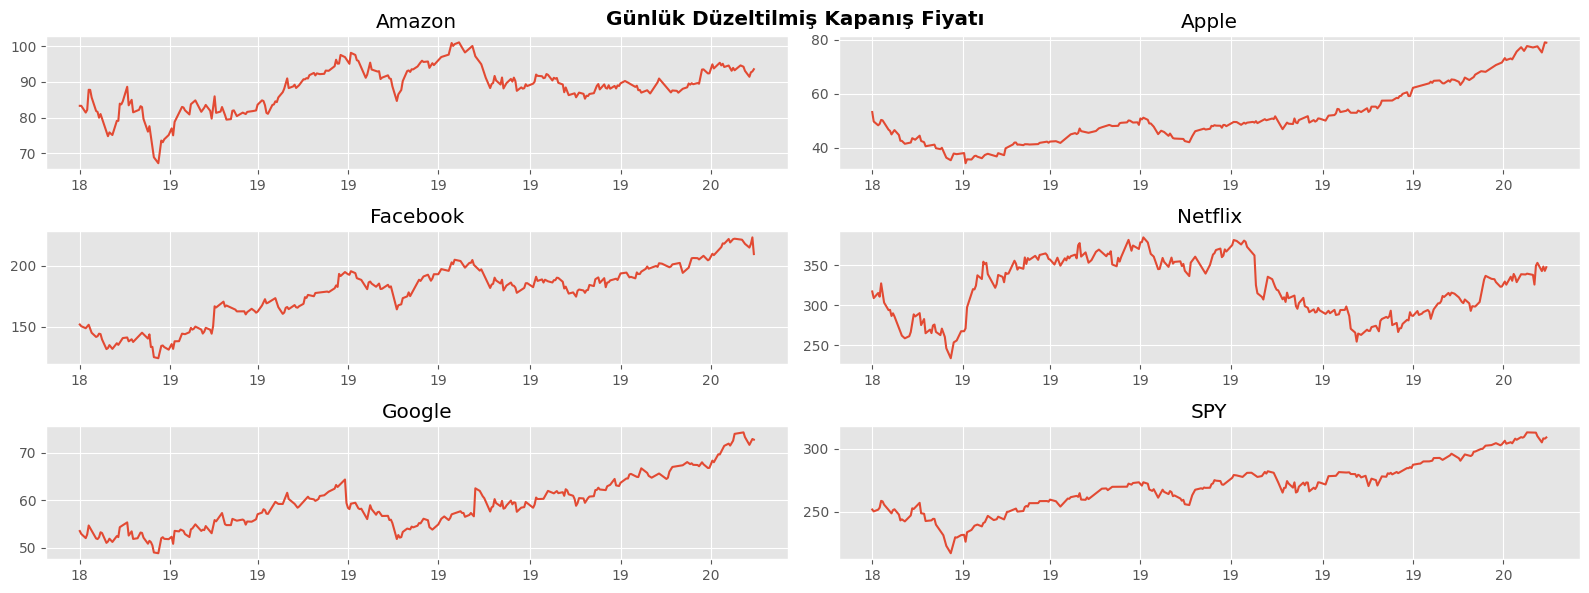

In [49]:
style.use('ggplot')
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(data['AMZN'])
ax1.set_title("Amazon")
ax2.plot(data['AAPL'])
ax2.set_title("Apple")
ax3.plot(data['META'])
ax3.set_title("Facebook")
ax4.plot(data['NFLX'])
ax4.set_title("Netflix")
ax5.plot(data['GOOG'])
ax5.set_title("Google")
ax6.plot(data['SPY'])
ax6.set_title("SPY")
ax1.xaxis.set_major_formatter(DateFormatter("%y"))
ax2.xaxis.set_major_formatter(DateFormatter("%y"))
ax3.xaxis.set_major_formatter(DateFormatter("%y"))
ax4.xaxis.set_major_formatter(DateFormatter("%y"))
ax5.xaxis.set_major_formatter(DateFormatter("%y"))
ax6.xaxis.set_major_formatter(DateFormatter("%y"))
plt.tight_layout()
fig.suptitle('Günlük Düzeltilmiş Kapanış Fiyatı')
plt.show()